Lyapunov simulations for Control + Ising experiments

 goal is to understand how chaos evolves with the  model

In [59]:
import numpy as np
import random
from fractions import Fraction
from Commands import dec2int, bernoulli, control, order_parameter
from MonteCarloCommands import energy, boltzmann_probability
import matplotlib.pyplot as plt


In [60]:
length = 100
random.seed(10)
times = 50
low_prob = 00
high_prob = 100 + 1
Beta = 0.1
K = 1 
num_chains = 2
spacing = 100
simulation_time = (length//2)
num_points = int(np.ceil((high_prob-low_prob)/spacing))
NeelState1 = dec2int(Fraction(1,3),length)
NeelState2 = dec2int(Fraction(2,3),length)

In [61]:
if (simulation_time) % 10 == 0:
    time_size = (length//2) +1
    delta = np.zeros((times, num_points, time_size, 2), dtype=float) # samples every 200 instances, delta[iterations, probabilities, sample through time,  chains per iteration]
else:
    time_size = (length//2)+2
    delta = np.zeros((times, num_points, time_size, 2), dtype=float)
# 1st case is to eliminate an extra empty array indice 

In [62]:
print(np.shape(delta), (length**2)//200)

(50, 2, 51, 2) 50


In [63]:

for k in range(0, times):
    j = 0
    print(k)
    
    # Probability of choosing the Control Map
    for prob in range(low_prob, high_prob, spacing):
        # initialize chains
        rep1 = random.getrandbits(length)
        rep1a = rep1 ^(1<<(length//2))
        rep2 = random.getrandbits(length)
        rep2a = rep2 ^(1<<(length//2))

        delta[k, prob//spacing, 0, 0] = np.abs((rep1-rep1a))
        delta[k, prob//spacing, 0, 1] = np.abs((rep2-rep2a))

        for i in range(simulation_time):
            if random.random() > (float(prob) / 100):
                rep1 = bernoulli(rep1, length)
                rep1a = bernoulli(rep1a, length)
            else:
                rep1 = control(rep1, length)
                rep1a = control(rep1a, length)
            if random.random() > (float(prob)/100):
                rep2 = bernoulli(rep2, length)
                rep2a = bernoulli(rep2a, length)
            else:
                rep2 = control(rep2, length)
                rep2a = control(rep2a, length)
            if (i%1) == 0 and i!=0:
                delta[k, prob//spacing, i,  0] = np.abs((rep1-rep1a))
                delta[k, prob//spacing, i,  1] = np.abs((rep2-rep2a))
            #if random.random() > (float(prob)/100):
            #    rep3 = bernoulli(rep3, length)
            #else:
            #    rep3 = control(rep3, length)
            # Initializing Ising Array for Monte Carlo Simulation
            lattice = [rep1, rep2]
            lattice2 = [rep1a, rep2a]
                       #format(rep3, '0'+str(length)+'b')]
            for repeat in range(1):
                for y_pos in range(0, length): # this section takes about 1/100 s at length = 100, accounts for most of the run time
                    for x_pos in range(0, num_chains):
                        E_i = energy(x_pos, y_pos, lattice, num_chains, length, K, True)
                        old = lattice[x_pos]
                        # noinspection PyTypeChecker
                        lattice[x_pos] = lattice[x_pos]^(0b1<<y_pos)
                        E_f = energy(x_pos, y_pos, lattice, num_chains, length, K, True)
                        E_i2 = energy(x_pos, y_pos, lattice2, num_chains, length, K, True)
                        old2 = lattice[x_pos]
                        # noinspection PyTypeChecker
                        lattice2[x_pos] = lattice[x_pos]^(0b1<<y_pos)
                        E_f2 = energy(x_pos, y_pos, lattice2, num_chains, length, K, True)
                        rand = random.random()
                        if rand <= boltzmann_probability(E_i, E_f, Beta):
                            pass
                        else:
                            lattice[x_pos] = old
                        if rand <= boltzmann_probability(E_i2, E_f2, Beta):
                            pass
                        else:
                            lattice2[x_pos] = old2
                        
            

            
            rep1 = lattice[0]
            rep1a = lattice2[0]
            rep2  = lattice[1]
            rep2a = lattice2[1]
            #rep3 = int(lattice[2], base=2)
        
        j += 1
        #print(j, number, rep, record[j])
        delta[k, prob//spacing,-1, 0] = np.abs((rep1-rep1a))
        delta[k, prob//spacing,-1, 1] = np.abs((rep2-rep2a))    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


Text(0.5, 1.0, ' Evolution of Chaos for Chain 2 $\\beta$=0.1')

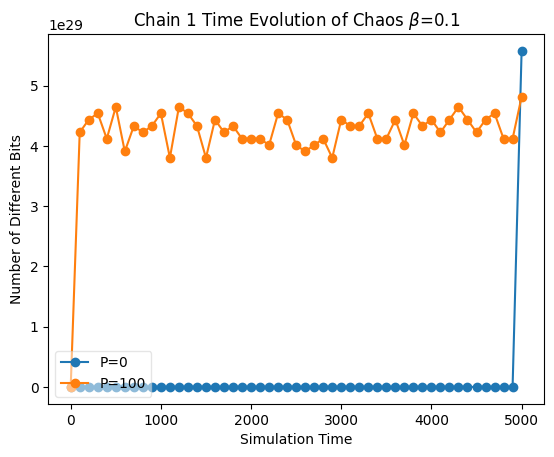

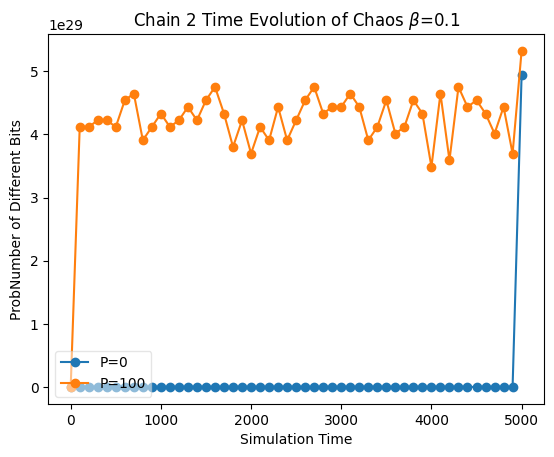

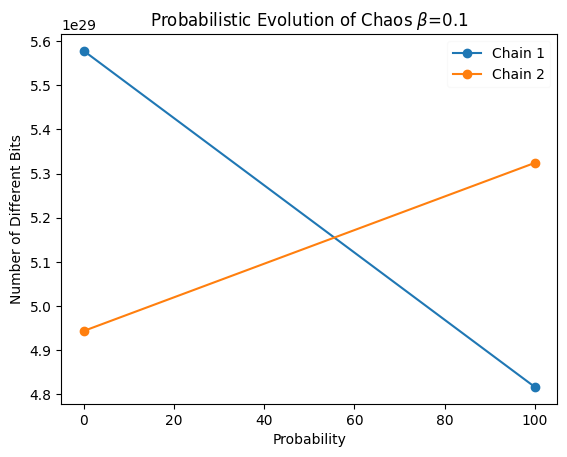

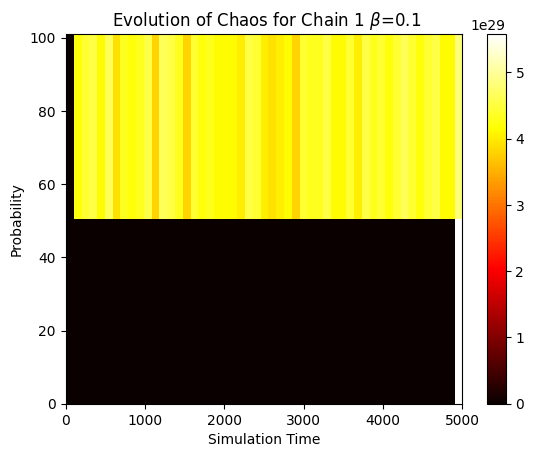

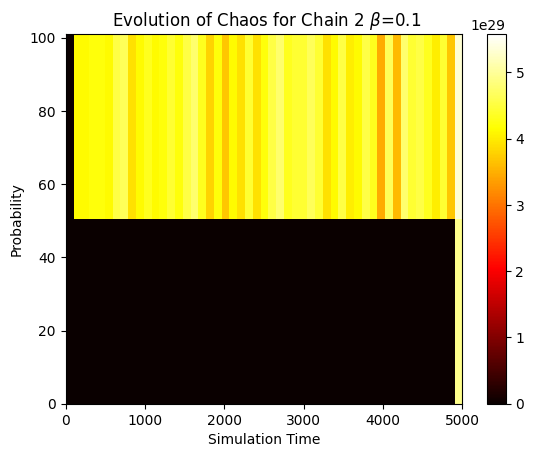

In [64]:
fig, ax = plt.subplots() #time evolution
for i in range(num_points):
    ax.plot( np.linspace(0,(length**2)//2, time_size), np.sum(delta, axis = 0)[i,:,0]/times, marker='o', label='P=' +str(i*spacing))
ax.legend(fancybox=True, framealpha=0.5, loc= 'lower left')
ax.set_xlabel(r'Simulation Time')
ax.set_ylabel(r'Number of Different Bits')
ax.set_title(r'Chain 1 Time Evolution of Chaos $\beta$=' + str(Beta))

fig, ax = plt.subplots() #time evolution Chain 2
for i in range(num_points):
    ax.plot( np.linspace(0,(length**2)//2, time_size), np.sum(delta, axis = 0)[i,:,1]/times, marker='o', label='P=' +str(i*spacing))
ax.legend( fancybox=True, framealpha=0.5, loc= 'lower left')
ax.set_xlabel(r'Simulation Time')
ax.set_ylabel(r'ProbNumber of Different Bits')
ax.set_title(r'Chain 2 Time Evolution of Chaos $\beta$=' + str(Beta))

fig, ax = plt.subplots() #probabilistic evolution
ax.plot( np.linspace(0,100, num_points), np.sum(delta, axis = 0)[:,-1,0]/times, marker='o')
ax.plot( np.linspace(0,100, num_points), np.sum(delta, axis = 0)[:,-1,1]/times, marker='o')
ax.legend(["Chain 1", "Chain 2"], fancybox=True, framealpha=0.1, loc= 'best')
ax.set_xlabel(r'Probability')
ax.set_ylabel(r'Number of Different Bits')
ax.set_title(r'Probabilistic Evolution of Chaos $\beta$=' + str(Beta))

fig,ax = plt.subplots()
rec1 = ax.imshow(np.average(delta, axis=0)[:,:,0], cmap='hot',interpolation = 'nearest', origin='lower', extent=[0,(length**2)//2,low_prob,high_prob],vmin=np.min(np.average(delta, axis=0)), vmax=np.max(np.average(delta, axis=0)), aspect='auto')
fig.colorbar(rec1, ax=ax, location ='right', shrink = 1)
ax.set_xlabel(r'Simulation Time')
ax.set_ylabel(r'Probability')
ax.set_title(r' Evolution of Chaos for Chain 1 $\beta$=' + str(Beta))

fig,ax = plt.subplots()
rec1 = ax.imshow(np.average(delta, axis=0)[:,:,1], cmap='hot',interpolation = 'nearest', origin='lower', extent=[0,(length**2)//2,low_prob,high_prob],vmin=np.min(np.average(delta, axis=0)), vmax=np.max(np.average(delta, axis=0)), aspect='auto')
fig.colorbar(rec1, ax=ax, location ='right', shrink = 1)
ax.set_xlabel(r'Simulation Time')
ax.set_ylabel(r'Probability')
ax.set_title(r' Evolution of Chaos for Chain 2 $\beta$=' + str(Beta))


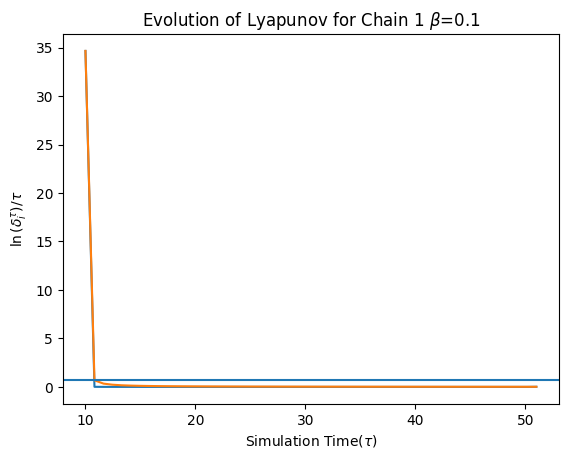

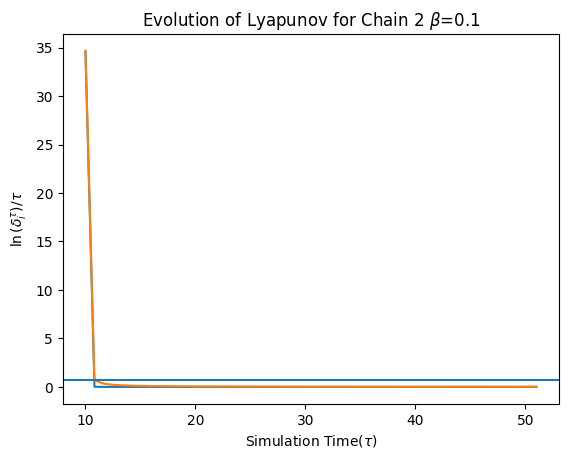

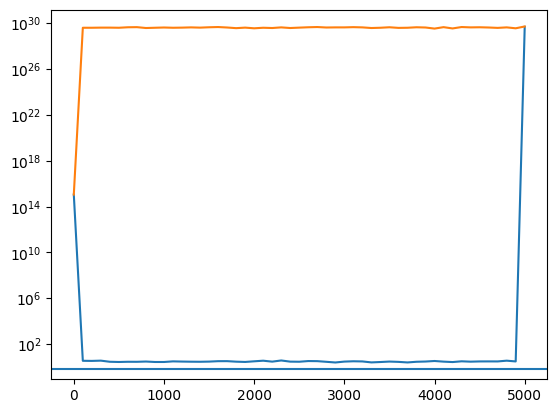

In [65]:
Average = np.average(delta, axis =0)
Log = np.log(Average)
for i in range(1, time_size):
    Log[:,i,:] = Log[:,i,:]/i/100

fig, ax = plt.subplots()
for i in range(num_points):
    ax.plot(np.linspace(10,  time_size, time_size), Log[i,0:,0])
ax.set_xlabel(r'Simulation Time($\tau$)')
ax.set_ylabel(r'$\ln{(\delta_{i}^\tau)}/\tau$')
ax.set_title(r'Evolution of Lyapunov for Chain 1 $\beta$=' + str(Beta))
plt.axhline(np.log(2))

fig, ax = plt.subplots()
for i in range(num_points):
    ax.plot(np.linspace(10,  time_size, time_size), Log[i,0:,1])
ax.set_xlabel(r'Simulation Time($\tau$)')
ax.set_ylabel(r'$\ln{(\delta_{i}^\tau)}/\tau$')
ax.set_title(r'Evolution of Lyapunov for Chain 2 $\beta$=' + str(Beta))
plt.axhline(np.log(2))

fig, ax = plt.subplots()
for i in range(num_points):
    ax.plot(np.linspace(0,(length**2)//2, time_size), Average[i,:,1])
#ax.set_xlim(0, (length**2)//2)
ax.set_yscale('log')
plt.axhline(np.log(2))
